## Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [ ]:
df = pd.read_excel("/content/eu_storedata.xlsx")
df.head().set_index("Row ID")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


In [ ]:
df.shape

(10000, 20)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Summary Of Data:
This dataset, consisting of `10,000` rows and `20` columns, offers a comprehensive view of orders placed, their shipping details, customer information, geographical distribution, and specifics about the products sold and their financial implications. Analyzing this data could provide insights into customer behavior, popular products, geographical sales trends, and the store's overall performance in the European market.

#### Column descriptions:
- `Row ID`: An identifier for each row in the dataset, likely used for referencing or indexing purposes.
- `Order ID`: A unique identifier assigned to each order placed by customers.

- `Order Date`: The date when the order was placed by the customer.

- `Ship Date`: The date when the order was shipped to the customer.

- `Ship Mode`: Indicates the method or mode used for shipping the order (e.g., standard shipping, Second Class, First Class and Same Day shipping).

- `Customer ID`: A unique identifier for each customer.

- `Customer Name`: Name of the customer who placed the order.

- `Segment`: Classification or segmentation of customers (e.g., consumer, corporate) based on certain criteria or characteristics.

- `City`: The city where the customer placing the order is located.

- `State`: The state or region where the customer is situated.

- `Country`: The country where the customer is located.

- `Region`: A broader geographical area or region where the store operates or where customers are based.

- `Product ID`: A unique identifier for each product being sold.

- `Category`: The broad category to which the product belongs (e.g., electronics, furniture).

- `Sub-Category`: A more specific category that further classifies the product (e.g., phones, chairs).

- `Product Name`: The name or description of the specific product being sold.

- `Sales`: The monetary value or revenue generated from the sale of the product in that order.

- `Quantity`: The number of units of the product sold in that particular order.

- `Discount`: Any discount or reduction applied to the product's original price for that order.

- `Profit`: The amount of profit or loss incurred from the sale of the product in that order, considering costs and revenue.

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.6
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.0


In [ ]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
39,40,IT-2018-5016792,2018-01-10,2018-01-12,Second Class,TB-21280,Toby Braunhardt,Consumer,Sonneberg,Thuringia,Germany,Central,OFF-AR-10000491,Office Supplies,Art,"Binney & Smith Pens, Water Color",75.600,5,0.00,27.150
7576,7577,ES-2017-2189870,2017-02-12,2017-02-16,Standard Class,CC-12475,Cindy Chapman,Consumer,Seville,Andalusía,Spain,South,OFF-BI-10000179,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",111.960,4,0.00,36.840
6766,3959,IT-2015-4565126,2015-11-29,2015-12-04,Second Class,RB-19570,Rob Beeghly,Consumer,Haarlem,North Holland,Netherlands,Central,OFF-AR-10003651,Office Supplies,Art,"Sanford Pencil Sharpener, Easy-Erase",121.905,9,0.50,-0.135
3068,3069,ES-2015-4187064,2015-02-22,2015-02-24,Second Class,JD-16060,Julia Dunbar,Consumer,Paris,Ile-de-France,France,Central,OFF-BI-10002193,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Recycled",9.780,2,0.00,2.340
4039,4040,ES-2016-3082564,2016-04-01,2016-04-06,Standard Class,SN-20560,Skye Norling,Home Office,Gateshead,England,United Kingdom,North,TEC-AC-10004849,Technology,Accessories,"SanDisk Router, Programmable",257.850,1,0.00,56.700
3450,6828,IT-2016-2699123,2016-04-14,2016-04-17,Second Class,JS-16030,Joy Smith,Consumer,Schiedam,South Holland,Netherlands,Central,TEC-PH-10000258,Technology,Phones,"Motorola Audio Dock, Cordless",264.330,3,0.50,-126.900
8535,8536,ES-2017-5079814,2017-09-20,2017-09-24,Second Class,GM-14455,Gary Mitchum,Home Office,Haguenau,Alsace-Champagne-Ardenne-Lorraine,France,Central,TEC-PH-10000956,Technology,Phones,"Motorola Speaker Phone, with Caller ID",330.939,3,0.15,27.189
516,517,ES-2018-3610373,2018-08-04,2018-08-10,Standard Class,MC-17845,Michael Chen,Consumer,Sarcelles,Ile-de-France,France,Central,OFF-BI-10000081,Office Supplies,Binders,"Ibico Index Tab, Clear",75.330,9,0.00,27.810
4630,9376,ES-2016-2716574,2016-01-17,2016-01-24,Standard Class,SF-20200,Sarah Foster,Consumer,Laon,Hauts-de-France,France,Central,OFF-BI-10001119,Office Supplies,Binders,"Wilson Jones Index Tab, Clear",17.730,3,0.00,1.530
1508,9119,IT-2016-3605163,2016-08-06,2016-08-12,Standard Class,EK-13795,Eileen Kiefer,Home Office,Emden,Lower Saxony,Germany,Central,FUR-CH-10002477,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, Red",1284.822,3,0.10,413.982


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10000 non-null  int64         
 1   Order ID       10000 non-null  object        
 2   Order Date     10000 non-null  datetime64[ns]
 3   Ship Date      10000 non-null  datetime64[ns]
 4   Ship Mode      10000 non-null  object        
 5   Customer ID    10000 non-null  object        
 6   Customer Name  10000 non-null  object        
 7   Segment        10000 non-null  object        
 8   City           10000 non-null  object        
 9   State          10000 non-null  object        
 10  Country        10000 non-null  object        
 11  Region         10000 non-null  object        
 12  Product ID     10000 non-null  object        
 13  Category       10000 non-null  object        
 14  Sub-Category   10000 non-null  object        
 15  Product Name   10000

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Country          0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,293.808906,3.777300,0.103105,37.282974
std,2886.89568,486.055635,2.203268,0.174782,178.100384
min,1.00000,2.955000,1.000000,0.000000,-3059.820000
25%,2500.75000,49.462500,2.000000,0.000000,1.320000
50%,5000.50000,119.355000,3.000000,0.000000,14.220000
75%,7500.25000,320.708625,5.000000,0.100000,48.510000
max,10000.00000,7958.580000,14.000000,0.850000,3979.080000


**Conclusion:**

In This Data:
- No Duplicate Value
- No Null Value
- Date coloumn in correct format

## **EDA:**

#### Coloumn Type:

**Numerical**

   -  Sales, Quantity, Discount, Profit

**Catagorical**

-  Ship Mode, Customer Name, Segment, City, State, Country, Region,Category, Sub-Category, Product Name

**Date Columns**

-  Order Date, Ship Date

**Mixed**
-   Product ID, Customer ID, Order ID


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


### Univariate Analysis

**Conclusion**
- Sales is positively skewd
- There are outlier
- No missing Values

In [ ]:
df["Sales"].describe()

count    10000.000000
mean       293.808906
std        486.055635
min          2.955000
25%         49.462500
50%        119.355000
75%        320.708625
max       7958.580000
Name: Sales, dtype: float64

<Axes: ylabel='Frequency'>

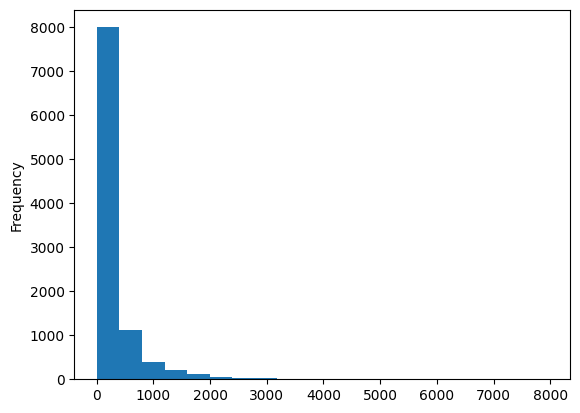

In [ ]:
df['Sales'].plot(kind='hist', bins = 20)

<Axes: ylabel='Density'>

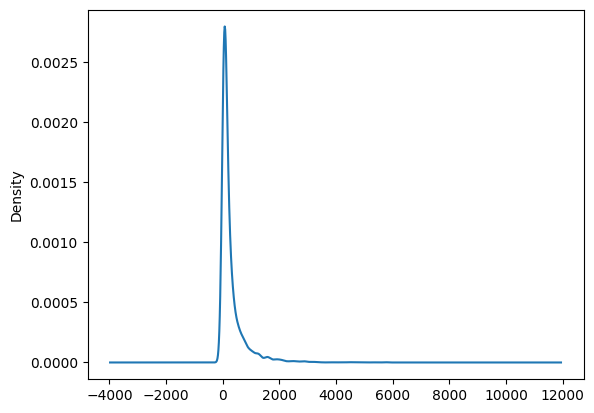

In [ ]:
df['Sales'].plot(kind='kde')

In [ ]:
df['Sales'].skew()

4.4983526652018755

<Axes: >

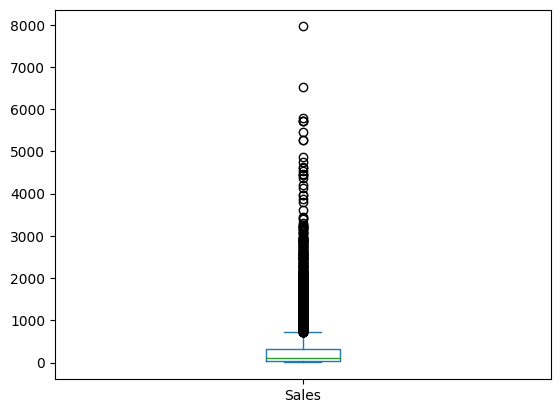

In [ ]:
df['Sales'].plot(kind = "box")

<Axes: >

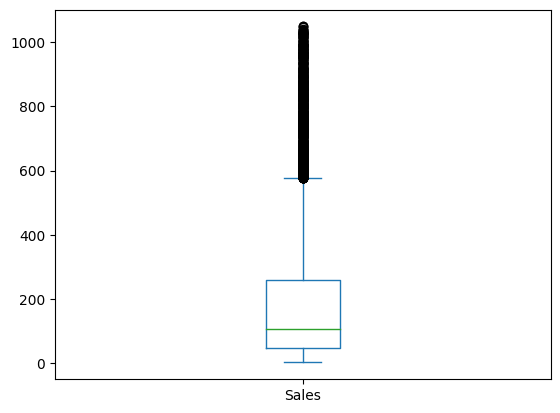

In [ ]:
df[df['Sales'] < 1050]['Sales'].plot(kind = "box")

**Conclusion**
- Positively Skewed
- There are some outliers

In [ ]:
# Quantity
df['Quantity'].describe()

count    10000.000000
mean         3.777300
std          2.203268
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

In [ ]:
df[df['Quantity']==14]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
325,326,ES-2016-2183106,2016-04-23,2016-04-27,Standard Class,DK-13150,David Kendrick,Corporate,Berlin,Berlin,Germany,Central,TEC-CO-10003342,Technology,Copiers,"Canon Wireless Fax, High-Speed",4748.436,14,0.1,844.116
890,891,ES-2017-1347677,2017-11-14,2017-11-19,Standard Class,JK-15370,Jay Kimmel,Consumer,Hamburg,Hamburg,Germany,Central,OFF-AR-10001606,Office Supplies,Art,"BIC Highlighters, Fluorescent",282.660,14,0.0,93.240
1774,1775,ES-2018-1651774,2018-09-08,2018-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,South,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080
2083,2084,ES-2015-3517120,2015-05-27,2015-05-31,Standard Class,GH-14485,Gene Hale,Corporate,Portsmouth,England,United Kingdom,North,OFF-ST-10004020,Office Supplies,Storage,"Tenex Lockers, Single Width",2858.520,14,0.0,171.360
2153,2154,ES-2018-4957212,2018-09-28,2018-10-01,First Class,MS-17770,Maxwell Schwartz,Consumer,Burnley,England,United Kingdom,North,OFF-AR-10001720,Office Supplies,Art,"Stanley Canvas, Blue",692.580,14,0.0,110.460
3509,3510,ES-2017-5365330,2017-06-10,2017-06-11,First Class,TB-21595,Troy Blackwell,Consumer,Madrid,Madrid,Spain,South,OFF-AR-10003066,Office Supplies,Art,"Sanford Markers, Water Color",370.020,14,0.0,33.180
3523,3524,ES-2016-3241112,2016-06-29,2016-07-04,Standard Class,AH-10120,Adrian Hane,Home Office,London,England,United Kingdom,North,OFF-SU-10001909,Office Supplies,Supplies,"Fiskars Scissors, Steel",284.256,14,0.1,122.976
3971,3972,ES-2015-3341008,2015-12-03,2015-12-04,First Class,AH-10210,Alan Hwang,Consumer,Paris,Ile-de-France,France,Central,OFF-BI-10003616,Office Supplies,Binders,"Avery Binding Machine, Clear",676.200,14,0.0,81.060
4338,4339,ES-2018-2873001,2018-04-17,2018-04-23,Standard Class,MH-18025,Michelle Huthwaite,Consumer,Hayange,Alsace-Champagne-Ardenne-Lorraine,France,Central,OFF-AR-10001606,Office Supplies,Art,"BIC Highlighters, Fluorescent",282.660,14,0.0,93.240
4997,4998,ES-2016-1557581,2016-06-14,2016-06-16,Second Class,PB-19210,Phillip Breyer,Corporate,Paris,Ile-de-France,France,Central,OFF-FA-10002803,Office Supplies,Fasteners,"Accos Staples, Metal",154.980,14,0.0,30.660


<Axes: ylabel='Density'>

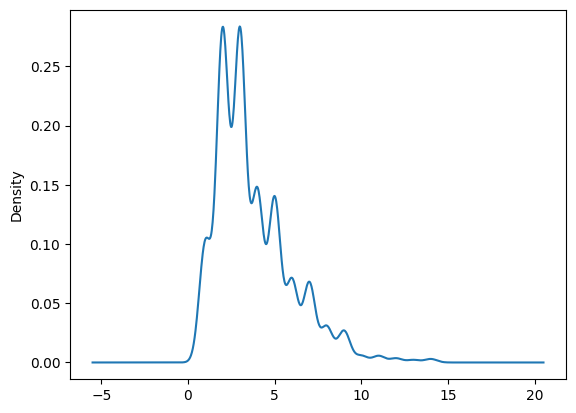

In [ ]:
df['Quantity'].plot(kind = 'kde')

<Axes: >

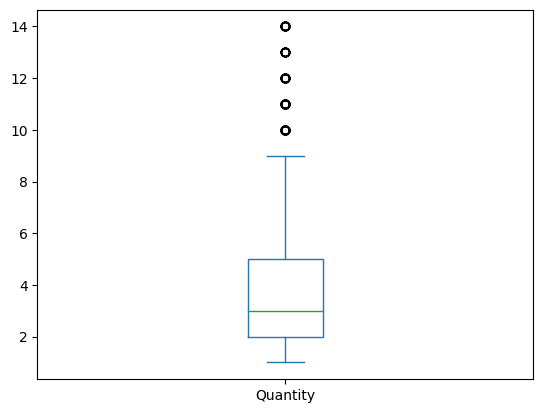

In [ ]:
df['Quantity'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

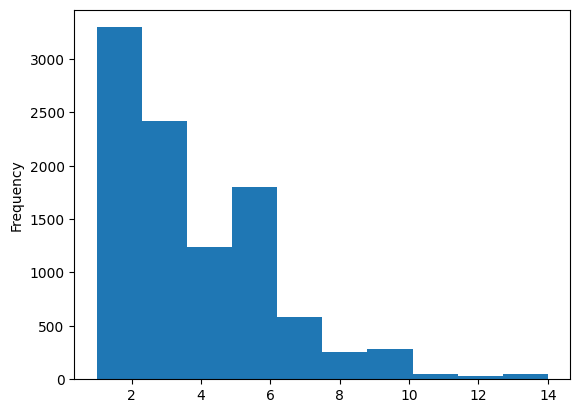

In [ ]:
df['Quantity'].plot(kind = 'hist')

In [ ]:
df['Quantity'].skew()

1.2876761929057376

**Conclusion**
-  Positively Skewd
- There are some outliers
- No Duplicate values
- No missing values

In [ ]:
# Discount
df["Discount"].describe ()

count    10000.000000
mean         0.103105
std          0.174782
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          0.850000
Name: Discount, dtype: float64

<Axes: >

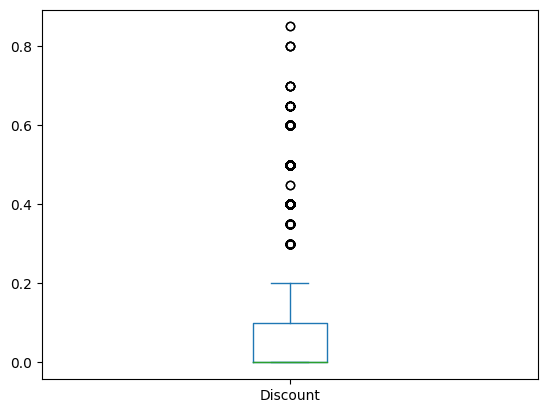

In [ ]:
df["Discount"].plot(kind="box")

<Axes: ylabel='Density'>

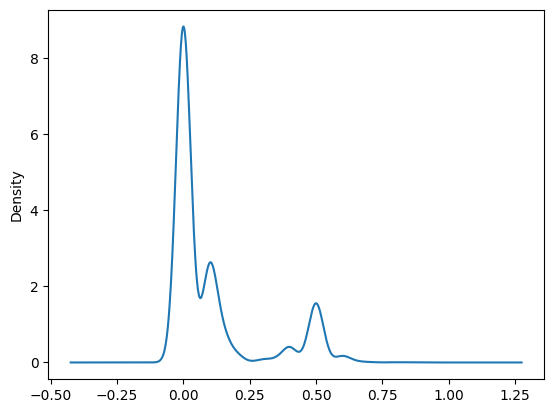

In [ ]:
df["Discount"].plot(kind="kde")

<Axes: ylabel='Frequency'>

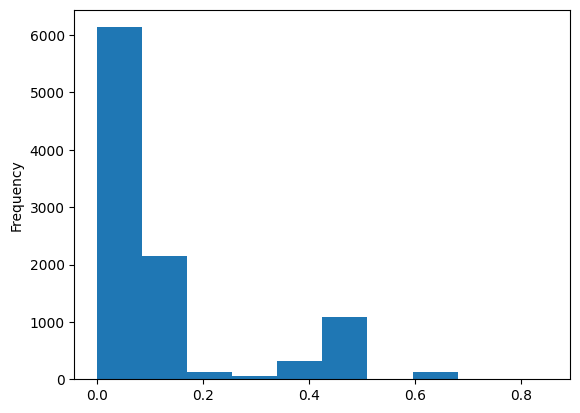

In [ ]:
df["Discount"].plot(kind="hist")

In [ ]:
df["Discount"].skew()

1.681444303769193

**Conclusion**
- There are some highly positive and negative outliers
- Profit is normally(Almost) distributed

In [ ]:
#Profit
df['Profit'].describe ()

count    10000.000000
mean        37.282974
std        178.100384
min      -3059.820000
25%          1.320000
50%         14.220000
75%         48.510000
max       3979.080000
Name: Profit, dtype: float64

In [ ]:
df[df["Profit"] == -3059.82]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2749,164,IT-2017-3695467,2017-06-10,2017-06-14,Standard Class,SS-20140,Saphhira Shifley,Corporate,Lisbon,Lisbon,Portugal,South,OFF-AP-10001623,Office Supplies,Appliances,"Hoover Stove, White",3399.66,12,0.5,-3059.82


<Axes: ylabel='Frequency'>

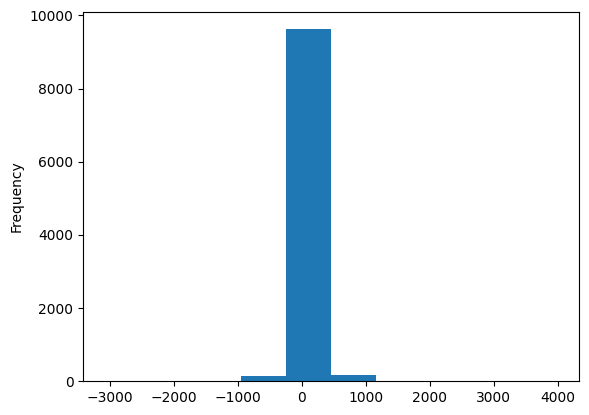

In [ ]:
df["Profit"].plot(kind = "hist")

<Axes: >

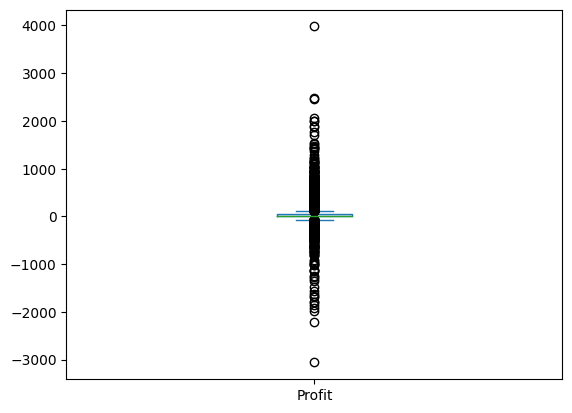

In [ ]:
df["Profit"].plot(kind = "box")

<Axes: ylabel='Density'>

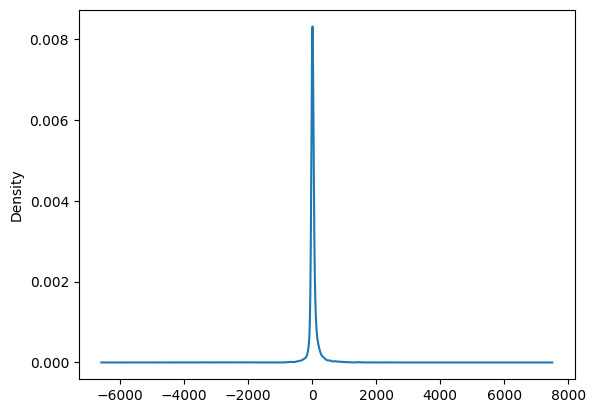

In [ ]:
df["Profit"].plot(kind = "kde")

In [ ]:
df["Profit"].skew()

1.6595121111197184

**Conclusion**
- "Standard Class" appears to be the most commonly used shipping mode
- "Standard Class" Mostly customer favor

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    6054
Second Class      1976
First Class       1454
Same Day           516
Name: Ship Mode, dtype: int64

<Axes: >

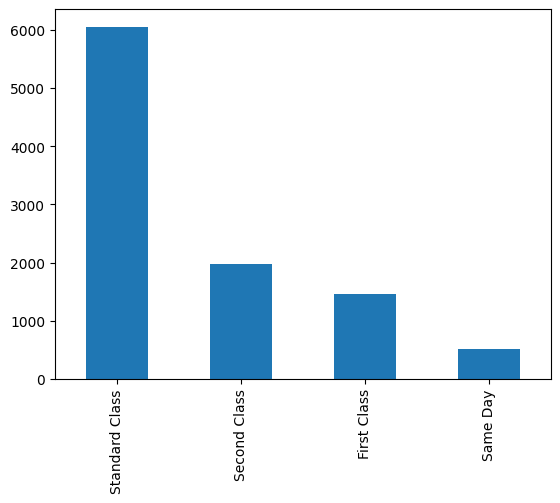

In [ ]:
df['Ship Mode'].value_counts().plot(kind='bar')

<Axes: ylabel='Ship Mode'>

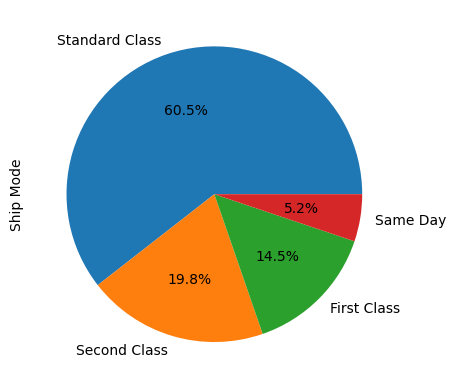

In [ ]:
df['Ship Mode'].value_counts().plot(kind='pie', autopct = "%0.1f%%")

In [ ]:
df['Segment'].value_counts()

Consumer       5186
Corporate      3077
Home Office    1737
Name: Segment, dtype: int64

**Conclusion**
-  Consumer Dominance: The store's primary customer base is comprised of individual consumers, representing the largest segment.

- Corporate and Home Office: While smaller in number compared to consumers, both the corporate and home office segments are significant, indicating the presence of business or office-related custome

<Axes: ylabel='Segment'>

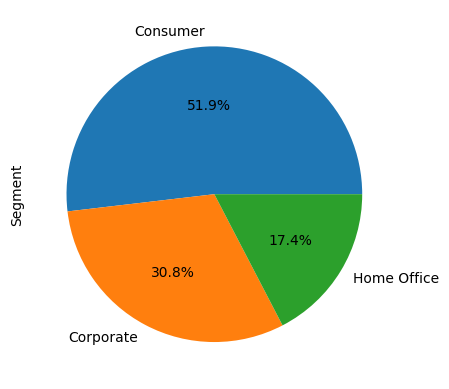

In [ ]:
df['Segment'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

<Axes: >

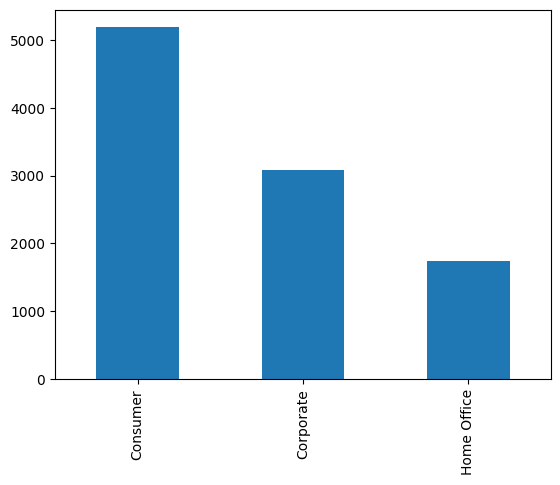

In [ ]:
df['Segment'].value_counts().plot(kind = "bar")

In [ ]:
# City
df['City'].value_counts().sort_values(ascending=False).head(10)

London       257
Berlin       217
Vienna       202
Paris        187
Madrid       171
Hamburg      133
Rome         129
Stockholm    124
Marseille    102
Milan         91
Name: City, dtype: int64

<Axes: >

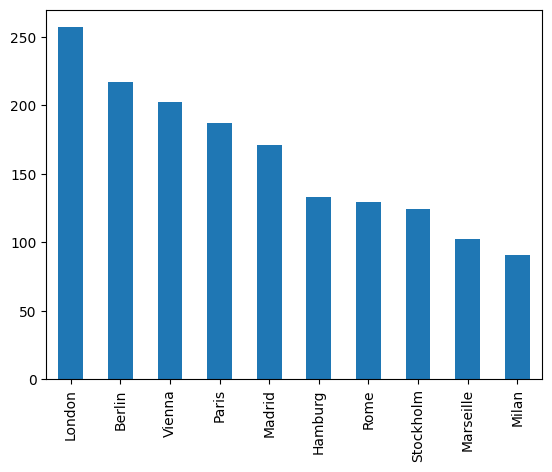

In [ ]:
df['City'].value_counts().sort_values(ascending=False).head(10).plot(kind="bar" )

<Axes: ylabel='City'>

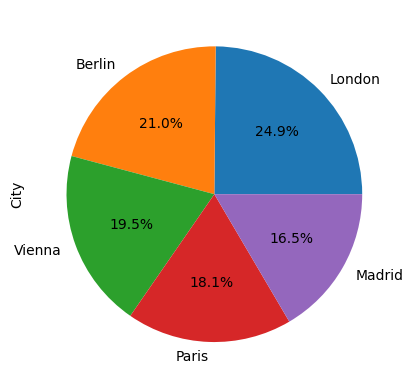

In [ ]:
df['City'].value_counts().sort_values(ascending=False).head(5).plot(kind="pie", autopct = "%0.1f%%" )

In [ ]:
df['Country'].value_counts()

France            2827
Germany           2065
United Kingdom    1633
Italy             1108
Spain              859
Netherlands        435
Austria            270
Sweden             203
Belgium            147
Ireland            106
Switzerland         78
Portugal            70
Norway              70
Denmark             65
Finland             64
Name: Country, dtype: int64

<Axes: >

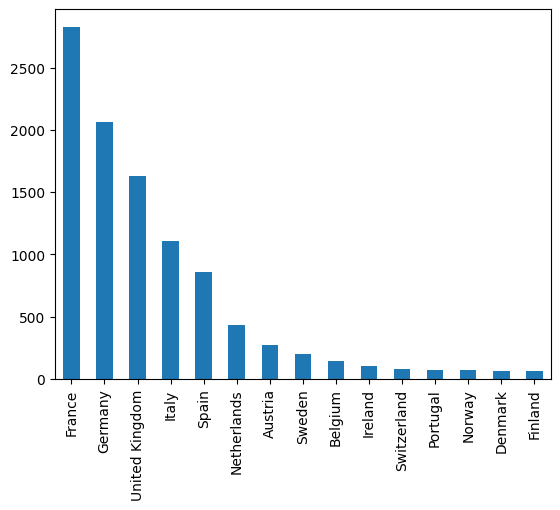

In [ ]:
df['Country'].value_counts().plot(kind="bar")

<Axes: ylabel='Country'>

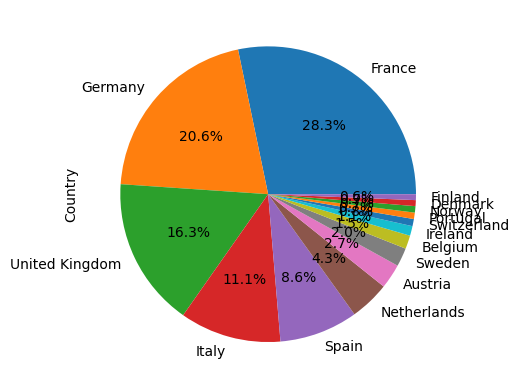

In [ ]:
df['Country'].value_counts().plot(kind="pie", autopct = "%0.1f%%")

In [ ]:
df["State"].value_counts()

England                       1499
Ile-de-France                  981
North Rhine-Westphalia         719
Provence-Alpes-Côte d'Azur     390
Auvergne-Rhône-Alpes           256
                              ... 
Aveiro                           1
Södermanland                     1
Zeeland                          1
Leiria                           1
Extremadura                      1
Name: State, Length: 127, dtype: int64

<Axes: >

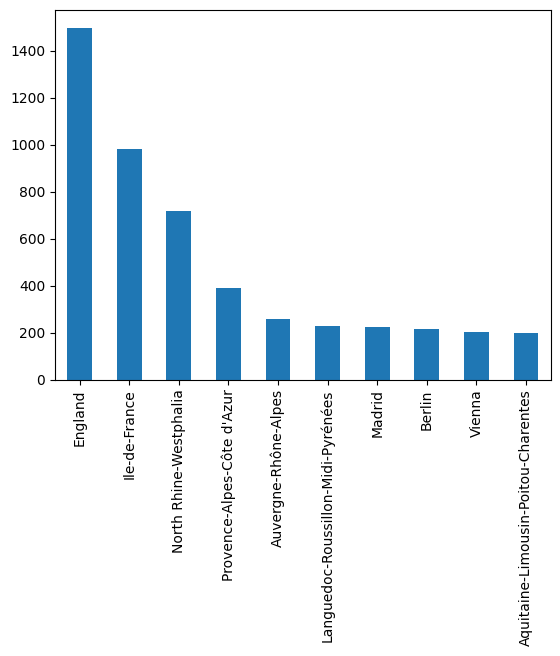

In [ ]:
df["State"].value_counts().head(10).plot(kind = "bar")

In [ ]:
df["Category"].value_counts()

Office Supplies    6589
Technology         1910
Furniture          1501
Name: Category, dtype: int64

<Axes: ylabel='Category'>

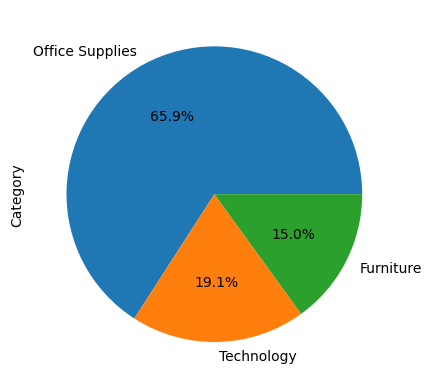

In [ ]:
df["Category"].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

In [ ]:
df["Sub-Category"].value_counts()

Art            1434
Binders        1317
Storage        1311
Phones          570
Bookcases       484
Chairs          465
Copiers         465
Furnishings     461
Labels          454
Accessories     452
Supplies        444
Paper           443
Envelopes       441
Fasteners       433
Machines        423
Appliances      312
Tables           91
Name: Sub-Category, dtype: int64

<Axes: >

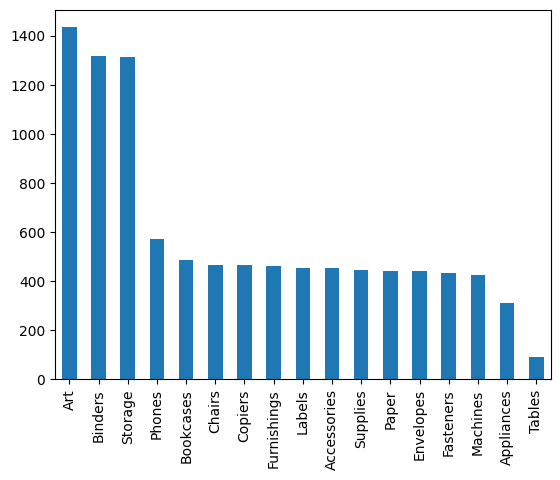

In [ ]:
df["Sub-Category"].value_counts().plot(kind = "bar")

In [ ]:
df["Region"].value_counts()

Central    5822
North      2141
South      2037
Name: Region, dtype: int64

<Axes: >

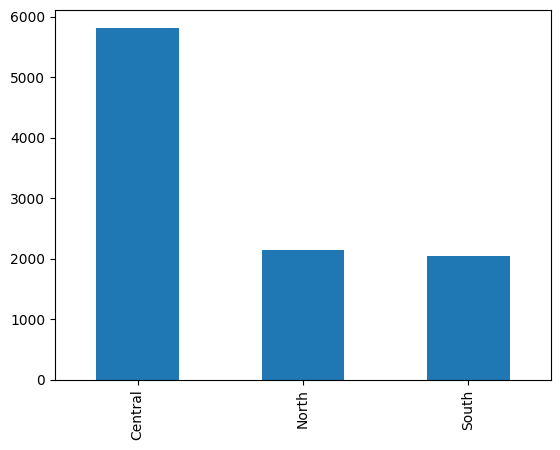

In [ ]:
df["Region"].value_counts().plot(kind = "bar")

## Bivariate Analysis

<Axes: xlabel='Quantity'>

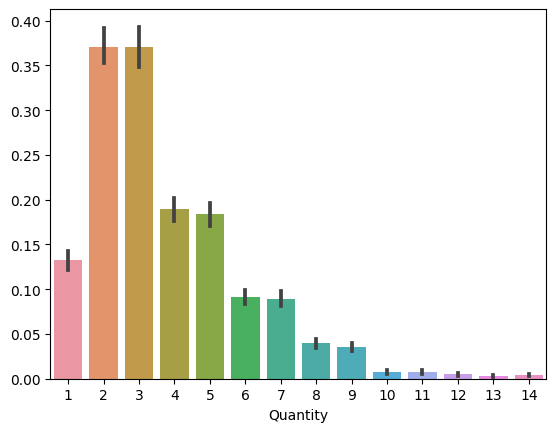

In [ ]:
sns.barplot(pd.crosstab(df["Sales"],df["Quantity"]))


In [ ]:
pd.crosstab(df["Segment"],df["Ship Mode"])

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,813,269,962,3142
Corporate,420,133,642,1882
Home Office,221,114,372,1030


In [ ]:
pd.crosstab(df["Segment"],df["Region"])

Region,Central,North,South
Segment,,,
Consumer,3057,1090,1039
Corporate,1747,671,659
Home Office,1018,380,339


In [ ]:
# Which category how much sales
main_category = df.groupby("Category")['Sales'].sum().reset_index()
main_category["Sales"] =round(main_category["Sales"],2)
main_category

,Category,Sales
0,Furniture,779103.05
1,Office Supplies,1046307.02
2,Technology,1112678.99


In [ ]:
# Which sub category category how much sales
sub_category = df.groupby("Sub-Category")['Sales'].sum().reset_index()
sub_category

,Sub-Category,Sales
0,Accessories,163073.4630
1,Appliances,275439.1830
2,Art,160088.1840
3,Binders,99762.6900
4,Bookcases,363525.6990
5,Chairs,228980.9670
6,Copiers,365128.6140
7,Envelopes,40124.0610
8,Fasteners,20330.3610
9,Furnishings,81215.0070


In [ ]:
# Profit by category
profit_per_category = df.groupby("Category")['Profit'].sum().reset_index()
profit_per_category["Profit"] = round(profit_per_category["Profit"],2)
profit_per_category

,Category,Profit
0,Furniture,68850.14
1,Office Supplies,159706.94
2,Technology,144272.66


-----
-----

**`EU_Store Data Case Study:`**


## **Customer Segmentation:**
-  `Customer segmentation is the process of dividing a customer base into distinct groups or segments that share similar characteristics, behaviors, or needs. By categorizing customers into different segments, businesses can better understand their diverse customer base and tailor their marketing strategies, products, and services to meet the specific needs of each group.`

In [ ]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


In [ ]:
# total spent per customer
total_spent = df.groupby(["Customer Name","Customer ID"])['Sales'].sum().reset_index()

In [ ]:
transaction_summary =df.groupby(["Customer Name","Customer ID"]).agg(
    n_transaction = ("Order ID",pd.Series.nunique), # Number of total transactions
    first_date = ("Order Date","min"),              # Date of first order
    last_date = ("Order Date","max"),               # Date of last order
).reset_index()

In [ ]:
# Merging the data
df1 = pd.merge(total_spent, transaction_summary, on = ["Customer Name","Customer ID"], how = 'left')

In [ ]:
# Rename the column name
df1 = df1.rename(columns={'Sales': 'total_spent'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  795 non-null    object        
 1   Customer ID    795 non-null    object        
 2   total_spent    795 non-null    float64       
 3   n_transaction  795 non-null    int64         
 4   first_date     795 non-null    datetime64[ns]
 5   last_date      795 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 43.5+ KB


In [ ]:
from datetime import datetime
reference_date = datetime.strptime("2019-01-31", "%Y-%m-%d")

In [ ]:
# Day since last vist by customer
df1["day_since_last_visit"] = (reference_date - df1['last_date']).dt.days
df1.head(2)

,Customer Name,Customer ID,total_spent,n_transaction,first_date,last_date,day_since_last_visit
0,Aaron Bergman,AB-10015,6116.454,12,2015-03-22,2018-04-23,283
1,Aaron Hawkins,AH-10030,3972.834,8,2015-06-18,2018-12-03,59


In [ ]:
# Sorting the data by date before calculating differences
temp_df = df.sort_values(['Customer ID', 'Customer Name', 'Order Date'])

# Calculating the last visit date per order per customer
temp_df = temp_df.groupby(["Customer ID", "Customer Name", "Order ID"])["Order Date"].max().reset_index()

# Calculating days between consecutive visits per customer
temp_df['last_visit_n'] = temp_df.groupby(["Customer ID", "Customer Name"])["Order Date"].diff().dt.days

# Taking absolute values of the differences
temp_df['last_visit_n'] = temp_df['last_visit_n'].abs()

# Calculating median days between transactions per customer
median_days = temp_df.groupby(["Customer ID", "Customer Name"])["last_visit_n"].median().reset_index()


In [ ]:
# Rename the columns
median_days = median_days.rename(columns={'last_visit_n': 'median_days'})

In [ ]:
# Merging Dataset

df2 = pd.merge(df1, median_days, on = ["Customer Name","Customer ID"], how = 'left')
df2.head(2)

,Customer Name,Customer ID,total_spent,n_transaction,first_date,last_date,day_since_last_visit,median_days
0,Aaron Bergman,AB-10015,6116.454,12,2015-03-22,2018-04-23,283,117.0
1,Aaron Hawkins,AH-10030,3972.834,8,2015-06-18,2018-12-03,59,121.0


In [ ]:
# Quatity purchase per customer in each Category
df_cat_qun = df.groupby(["Customer ID", 'Customer Name', 'Category'])["Sales"].sum().reset_index()
df_cat_qun = df_cat_qun.rename(columns={"Sales":"sale_per_category"})
df_cat_qun.head(3)

,Customer ID,Customer Name,Category,sale_per_category
0,AA-10315,Alex Avila,Furniture,3255.588
1,AA-10315,Alex Avila,Office Supplies,825.828
2,AA-10315,Alex Avila,Technology,2024.211


In [ ]:
# Quatity purchase per customer in each Sub-Category
df_scat_qun = df.groupby(["Customer ID", 'Customer Name', 'Sub-Category'])["Sales"].sum().reset_index()
df_scat_qun = df_scat_qun.rename(columns={"Sales":"sale_per_subcategory"})
df_scat_qun.head(6)

,Customer ID,Customer Name,Sub-Category,sale_per_subcategory
0,AA-10315,Alex Avila,Art,286.728
1,AA-10315,Alex Avila,Binders,110.160
2,AA-10315,Alex Avila,Bookcases,3225.600
3,AA-10315,Alex Avila,Furnishings,29.988
4,AA-10315,Alex Avila,Phones,2024.211
5,AA-10315,Alex Avila,Storage,428.940


In [ ]:
# Merging
temp_df1 = pd.merge(df_cat_qun,df_scat_qun,on = ["Customer ID","Customer Name"], how = 'left')
temp_df1

,Customer ID,Customer Name,Category,sale_per_category,Sub-Category,sale_per_subcategory
0,AA-10315,Alex Avila,Furniture,3255.588,Art,286.7280
1,AA-10315,Alex Avila,Furniture,3255.588,Binders,110.1600
2,AA-10315,Alex Avila,Furniture,3255.588,Bookcases,3225.6000
3,AA-10315,Alex Avila,Furniture,3255.588,Furnishings,29.9880
4,AA-10315,Alex Avila,Furniture,3255.588,Phones,2024.2110
...,...,...,...,...,...,...
17406,ZD-21925,Zuschuss Donatelli,Technology,1078.650,Labels,43.2000
17407,ZD-21925,Zuschuss Donatelli,Technology,1078.650,Machines,127.2240
17408,ZD-21925,Zuschuss Donatelli,Technology,1078.650,Paper,133.6800
17409,ZD-21925,Zuschuss Donatelli,Technology,1078.650,Storage,245.0880


## RFM
- **RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.**
-- `Recency:` How recently a customer made a purchase.
-- `Frequency:` How often customers make a purchase.
-- `Monetary Value:` How much money a customer spends on purchases.

`Recency` --> `day_since_last_visti`

`Frequency` --> `n_transaction`

`Monetary Value` --> `total_spent`

In [ ]:
# Making Copy of Data
df_rfm = df2.copy()

In [ ]:
# Making interval and doing labeling
df_rfm["recency"] = pd.qcut(df_rfm['day_since_last_visit'], q = 5, labels=[5,4,3,2,1])
df_rfm["frequency"] = pd.qcut(df_rfm['n_transaction'], q = 5 , labels=[1,2,3,4,5])
df_rfm["monetary"] = pd.qcut(df_rfm['total_spent'], q = 5 , labels=[1,2,3,4,5])
df_rfm.head(10)

,Customer Name,Customer ID,total_spent,n_transaction,first_date,last_date,day_since_last_visit,median_days,recency,frequency,monetary
0,Aaron Bergman,AB-10015,6116.454,12,2015-03-22,2018-04-23,283,117.0,1,5,5
1,Aaron Hawkins,AH-10030,3972.834,8,2015-06-18,2018-12-03,59,121.0,4,4,4
2,Aaron Smayling,AS-10045,6710.409,13,2015-03-22,2018-12-08,54,245.5,5,5,5
3,Adam Bellavance,AB-10060,3343.296,5,2016-12-20,2018-05-19,257,133.0,2,2,3
4,Adam Hart,AH-10075,4524.624,9,2015-06-11,2018-12-01,61,304.0,4,5,4
5,Adam Shillingsburg,AS-10090,4138.902,8,2015-05-22,2018-12-16,46,200.0,5,4,4
6,Adrian Barton,AB-10105,2950.398,6,2016-06-13,2018-12-04,58,263.0,4,2,3
7,Adrian Hane,AH-10120,3590.691,6,2016-06-29,2018-09-09,144,321.0,3,2,3
8,Adrian Shami,AS-10135,2472.831,3,2016-07-13,2017-04-13,658,137.0,1,1,2
9,Aimee Bixby,AB-10150,9138.762,6,2015-01-25,2018-09-19,134,407.0,3,2,5


In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer Name         795 non-null    object        
 1   Customer ID           795 non-null    object        
 2   total_spent           795 non-null    float64       
 3   n_transaction         795 non-null    int64         
 4   first_date            795 non-null    datetime64[ns]
 5   last_date             795 non-null    datetime64[ns]
 6   day_since_last_visit  795 non-null    int64         
 7   median_days           785 non-null    float64       
 8   recency               795 non-null    category      
 9   frequency             795 non-null    category      
 10  monetary              795 non-null    category      
dtypes: category(3), datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 58.8+ KB


In [ ]:
# Converting `recency`, `frequency` and `monetary` in integer from category
df_rfm['recency'] = df_rfm['recency'].astype(int)
df_rfm['frequency'] = df_rfm['frequency'].astype(int)
df_rfm['monetary'] = df_rfm['monetary'].astype(int)

In [ ]:
# RFM Score
df_rfm['rfm_score'] = (df_rfm['recency'] * 100) + (df_rfm['frequency'] * 10) + df_rfm['monetary']

| Segments | Scores |
| -------- | -------- |
| Champions | 555, 554, 544, 545, 454, 455, 445 |
| Loyal customers | 543, 444, 435, 355, 354, 345, 344, 335 |
| Potential loyalist | 553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323 |
| Recent customers	 | 512, 511, 422, 421, 412, 411, 311 |
| Promising | 525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313 |
| Customers needing attention | 535, 534, 443, 434, 343, 334, 325, 324 |
| About to sleep	 | 331, 321, 312, 221, 213
 |
| At risk | 255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124 |
| Can’t lose them | 155, 154, 144, 214, 215, 115, 114, 113 |
| Hibernating	 | 332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211 |
| Lost | 111, 112, 121, 131, 141, 151 |
------------------------------------------- | -----------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
# Define segments based on RFM score
conditions = [
    (df_rfm['rfm_score'].isin([555, 554, 544, 545, 454, 455, 445])),
    (df_rfm['rfm_score'].isin([543, 444, 435, 355, 354, 345, 344, 335])),
    (df_rfm['rfm_score'].isin([553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323])),
    (df_rfm['rfm_score'].isin([512, 511, 422, 421, 412, 411, 311])),
    (df_rfm['rfm_score'].isin([525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313])),
    (df_rfm['rfm_score'].isin([535, 534, 443, 434, 343, 334, 325, 324])),
    (df_rfm['rfm_score'].isin([331, 321, 312, 221, 213])),
    (df_rfm['rfm_score'].isin([255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124])),
    (df_rfm['rfm_score'].isin([155, 154, 144, 214, 215, 115, 114, 113])),
    (df_rfm['rfm_score'].isin([332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211])),
    (df_rfm['rfm_score'].isin([111, 112, 121, 131, 141, 151]))
]

##Step by step RFM segmentation algorithm

1. Calculate Recency (R), Frequency (F), and Monetary (M) values at the
customer, source, brand, and country levels.

2. Calculate approximate quantile cutoff values for R, F, and M using the approxQuantile() function. Quantiles divide the data into five equal parts.

3. Calculate the RFM score based on quantile cutoff values. For example, customers who are frequent buyers, have recently bought from you, and usually are spending a lot of money would get a score of 555: Recency (R) = 5, Frequency (F) = 5, Monetary (M) = 5.

4. Get RFM segment based on the RFM score (using RFM Matrix).

## Understanding different segments  
| Customer segment | Description         |
| ---------------- | ---------------- |
| Champions  | Recent purchase, frequent transactions, high spending  |
| Loyal Customers  | Often spend good money buying your products. Responsive to promotions  |
| Potential Loyalist  | Recent customers but spent a good amount and bought more than once  |
| Recent Customers	  | Bought most recently, but not often  |
| Promising	  | Recent shoppers but haven’t spent much  |
| Customers Needing Attention  | Above-average recency, frequency and monetary values. They may not have bought very recently though  |
| About to Sleep  | Below average recency, frequency, and monetary values. Will lose them if not reactivated|
| At Risk  | They spent big money and purchased often. But the last purchase was a long time ago |
| Can’t Lose Them  | Often made the biggest purchases but they haven’t returned for a long time  |
| Hibernating | The last purchase was long ago. Low spenders with a low number of order |
| Lost | Lowest recency, frequency, and monetary scores |



In [ ]:
choices = [
    "Champions",
    "Loyal Customers",
    "Potential Loyalist",
    "Recent Customers",
    "Promising",
    "Customers Needing Attention",
    "About to Sleep",
    "At Risk",
    "Can’t Lose Them",
    "Hibernating",
    "Lost"
]


In [ ]:
df_rfm['rfm_segment'] = np.select(conditions, choices, default="Other")


In [ ]:
df_rfm.head()

,Customer Name,Customer ID,total_spent,n_transaction,first_date,last_date,day_since_last_visit,median_days,recency,frequency,monetary,rfm_score,rfm_segment
0,Aaron Bergman,AB-10015,6116.454,12,2015-03-22,2018-04-23,283,117.0,1,5,5,155,Can’t Lose Them
1,Aaron Hawkins,AH-10030,3972.834,8,2015-06-18,2018-12-03,59,121.0,4,4,4,444,Loyal Customers
2,Aaron Smayling,AS-10045,6710.409,13,2015-03-22,2018-12-08,54,245.5,5,5,5,555,Champions
3,Adam Bellavance,AB-10060,3343.296,5,2016-12-20,2018-05-19,257,133.0,2,2,3,223,Hibernating
4,Adam Hart,AH-10075,4524.624,9,2015-06-11,2018-12-01,61,304.0,4,5,4,454,Champions


In [ ]:
# Merging
final_customer_data = pd.merge(temp_df1, df_rfm, on = ["Customer ID","Customer Name"], how = 'left')
final_customer_data.head(2)

,Customer ID,Customer Name,Category,sale_per_category,Sub-Category,sale_per_subcategory,total_spent,n_transaction,first_date,last_date,day_since_last_visit,median_days,recency,frequency,monetary,rfm_score,rfm_segment
0,AA-10315,Alex Avila,Furniture,3255.588,Art,286.728,6105.627,7,2016-05-17,2018-12-18,44,102.5,5,3,5,535,Customers Needing Attention
1,AA-10315,Alex Avila,Furniture,3255.588,Binders,110.160,6105.627,7,2016-05-17,2018-12-18,44,102.5,5,3,5,535,Customers Needing Attention


In [ ]:
# Downlaod data in csv files
final_customer_data.to_csv("final_customer_data.csv", index=False)

In [ ]:
rfm = pd.read_csv("final_customer_data.csv")
rfm.head(2)

,Customer ID,Customer Name,Category,sale_per_category,Sub-Category,sale_per_subcategory,total_spent,n_transaction,first_date,last_date,day_since_last_visit,median_days,recency,frequency,monetary,rfm_score,rfm_segment
0,AA-10315,Alex Avila,Furniture,3255.588,Art,286.728,6105.627,7,2016-05-17,2018-12-18,44,102.5,5,3,5,535,Customers Needing Attention
1,AA-10315,Alex Avila,Furniture,3255.588,Binders,110.160,6105.627,7,2016-05-17,2018-12-18,44,102.5,5,3,5,535,Customers Needing Attention


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.groupby(['Customer ID','Customer Name'])['Segment'].unique()


Customer ID  Customer Name     
AA-10315     Alex Avila             [Consumer]
AA-10375     Allen Armold           [Consumer]
AA-10480     Andrew Allen           [Consumer]
AA-10645     Anna Andreadi          [Consumer]
AB-10015     Aaron Bergman          [Consumer]
                                      ...     
XP-21865     Xylona Preis           [Consumer]
YC-21895     Yoseph Carroll        [Corporate]
YS-21880     Yana Sorensen         [Corporate]
ZC-21910     Zuschuss Carroll       [Consumer]
ZD-21925     Zuschuss Donatelli     [Consumer]
Name: Segment, Length: 795, dtype: object

In [ ]:
r2=rfm.groupby("Customer Name")['rfm_segment'].unique().reset_index()

In [ ]:
r2['rfm_segment'] = r2['rfm_segment'].apply(lambda x: ', '.join(map(str, x)))


In [ ]:
r2 = r2[r2['rfm_segment'] == 'Champions'].head()

In [ ]:
r2

,Customer Name,rfm_segment
2,Aaron Smayling,Champions
4,Adam Hart,Champions
5,Adam Shillingsburg,Champions
10,Alan Barnes,Champions
22,Alex Russell,Champions
